<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 2. Trabajando con redes neuronales y Deep Learning</header1></left>

Presentado por: Estefania Del Pilar Aracena Vallejos  <br>
Fecha: 26/05/2023

# Importación de librerias necesarias

# Parte I. Regresión

In [1]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import svm
from sklearn.metrics import accuracy_score
import scipy.stats
print(tf.__version__)

2.12.0


## Cargar el Dataset

Con al menos 1000 instancias, una variable/atributo de la salida, y que dependa de, al menos, 6 variables/atributos de entrada. 

In [2]:
#Código para cargar el Dataset
url = 'https://raw.githubusercontent.com/EstefaniaAracena/MasterUnir/main/diamonds.csv'
data=pd.read_csv(url, usecols=[1,2,3,4,5,6,7,8,9,10], nrows=2000)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Descripción de la fuente del Dataset

El data set se obtuvo de "Kaggle" y tiene por nombre: "Data Analysis on Diamonds Dataset". 

Link: https://www.kaggle.com/datasets/swatikhedekar/price-prediction-of-diamond

Kaggle es una plataforma en donde podemos encontrar bases de datos (públicos) para análisis y aprendizaje automático. 

El dataset se descargó en formao .csv y luego se publicó en un repositorio propio (https://github.com/EstefaniaAracena/MasterUnir/blob/main/diamonds.csv) para hacer la carga de datos a este notebook de forma rápida y sencilla).

## Explique el problema a resolver. 

Lo modelos que se presentarán a continuación tienen como objetivo predecir el precio de un diamante basándose en características como el tipo de corte (cut), color, dimensiones (x,y,z), claridad (clarity), el peso (carat), profundidad (depth) y tabla (table). 
Para esto se compararán 3 modelos y se espera concluir cual entrega la mejor predicción. Los modelos serán: 
- modelo 1: construcción de una red neuronal (NR)
- modelo 2: random forest regressor (RFR)
- modelo 3: regresión con máquina de vectores (SVM - SVR)

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

Se incorporá una pequeña descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


In [3]:
print('Número de instancias en total:')
print(data.shape) #entrega número de columnas y de filas
print("El dataset cuenta con 2000 filas y 10 columnas de atributos, en donde la coumna 'price' corresponde a la variable objetivo.")

Número de instancias en total:
(2000, 10)
El dataset cuenta con 2000 filas y 10 columnas de atributos, en donde la coumna 'price' corresponde a la variable objetivo.


In [4]:
print('Número de atributos de entrada, su significado y tipo:')
print(data.info()) #entrega un resumen de la tabla, cuantas instancias y de que tipo
print("Las variables 'color', 'clarity' y 'cut' son de tipo categórico, no hay celdas vacías")

Número de atributos de entrada, su significado y tipo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    2000 non-null   float64
 1   cut      2000 non-null   object 
 2   color    2000 non-null   object 
 3   clarity  2000 non-null   object 
 4   depth    2000 non-null   float64
 5   table    2000 non-null   float64
 6   price    2000 non-null   int64  
 7   x        2000 non-null   float64
 8   y        2000 non-null   float64
 9   z        2000 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 156.4+ KB
None
Las variables 'color', 'clarity' y 'cut' son de tipo categórico, no hay celdas vacías


In [5]:
print('Estadisticas de la variable objetivo:')
data['price'].describe()

Estadisticas de la variable objetivo:


count    2000.000000
mean     2626.338000
std       786.994922
min       326.000000
25%      2804.000000
50%      2878.000000
75%      2982.000000
max      3099.000000
Name: price, dtype: float64

In [6]:
print('Estadisticas de los atributos:')
data.describe() #entrega un resumen de la tabla, cuantas instancias por cada clase y frecuencia más alta

Estadisticas de los atributos:


,carat,depth,table,price,x,y,z
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.00000,2000.00000
mean,0.711885,61.783000,57.58960,2626.338000,5.67144,5.67005,3.50339
std,0.185737,1.644842,2.36414,786.994922,0.57645,0.56495,0.36325
min,0.200000,53.000000,51.00000,326.000000,3.79000,3.75000,2.27000
25%,0.700000,61.000000,56.00000,2804.000000,5.66000,5.68000,3.48000
50%,0.720000,61.800000,57.00000,2878.000000,5.78000,5.79000,3.56000
75%,0.800000,62.600000,59.00000,2982.000000,5.95000,5.95000,3.67250
max,1.500000,69.500000,70.00000,3099.000000,7.26000,7.09000,4.70000


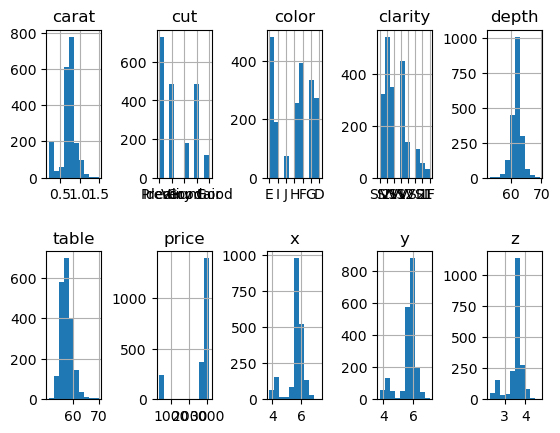

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=5)
plt.subplots_adjust(wspace=1, hspace=0.5)
data['carat'].hist(ax=axes[0,0]).set_title("carat")
data['cut'].hist(ax=axes[0,1]).set_title("cut")
data['color'].hist(ax=axes[0,2]).set_title("color")
data['clarity'].hist(ax=axes[0,3]).set_title("clarity")
data['depth'].hist(ax=axes[0,4]).set_title("depth")
data['table'].hist(ax=axes[1,0]).set_title("table")
data['price'].hist(ax=axes[1,1]).set_title("price")
data['x'].hist(ax=axes[1,2]).set_title("x")
data['y'].hist(ax=axes[1,3]).set_title("y")
data['z'].hist(ax=axes[1,4]).set_title("z")
plt.savefig('hist-atributos.png')
plt.show()

Para este set de datos, se reconocen 10 atributos, 9 de ellos serán utilizados como entradas (carat, cut, color, clarity, depth, table, x, y, z) y 1 atributo es el objetivo (price). Cada atributo cuenta con 5000 instancias.
    
7 variables son numéricas (carat, depth, table, price x, y, z) y 3 variables son categoricas (cut, color, clarity) no hay celdas vacías o valores atípicos, como se observa en los histogramas para los atributos de entrada.

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [8]:
#Código que realice las transformaciones necesarias para poder realizar los procesos de modelación. Ej.One hot enconding
data_encoder=pd.get_dummies(data)

## División del dataset en datos de entrenamiento y datos de test 

In [9]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
x_train = data_encoder.sample(frac=0.7,random_state=0)
x_test = data_encoder.drop(x_train.index)
y_train = x_train.pop("price")
y_test = x_test.pop("price")

## Propuesta de arquitectura de red neuronal

Describe: 

+ las neuronas en la capa de entrada: la capa de entrada tendrá 128 neuronas
+ las capas intermedias:  hay 3 capas intermedias, una capa con 128 neuronas y 2 capas con 64 neuronas. 
+ capa de salida: la capa de salida tiene 1 neurona 
+ funciones de activación: se utiliza para todas las capas la función de activación "ReLU". 

#### Se definieron estos parámetros luego de múltiples pruebas

In [10]:
# Código de la estructuración de la red
#Se eligieron 128 neuronas en capa de entrada, 3 capas escondidas, 1 con 128 neuronas y 2 capas con 64 reunonas. 
#La función de activación escogida fue ReLU.
#La capa de salida tiene 1 neurona, ya que estamos realizando un moedelo de regresión
#Estos parámetros fueron elegidos luego re la realización de múltiples pruebas con distintas funciones de activación, 
#número de neuronas y capas. 
modelo1 = keras.Sequential([
    layers.Dense(128, activation='relu', use_bias=True, input_shape=x_train.shape[1:]),
    layers.Dense(128, activation='relu', use_bias=True),
    layers.Dense(64, activation='relu', use_bias=True),
    layers.Dense(64, activation='relu', use_bias=True),
    layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

modelo1.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

In [11]:
#Código de la inspección del modelo de red
modelo1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3456      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 32,449
Trainable params: 32,449
Non-trainable params: 0
_________________________________________________________________


##  Ajuste de modelo de Regresión RNA

Mediante Python y utilizando al menos Keras sobre TensorFlow 2.0 (tensorflow.keras), entrena el modelo o modelos de red neuronal escogidos.

In [12]:
#Código de ajuste y entrenamiento
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = modelo1.fit(x_train, y_train, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

## Evaluación de modelo RNA

Defina las estadísticas (métricas) de evaluación, y dividiendo el dataset en datos de entrenamiento, validación y datos de test prueba tu propuesta.


### Visualice el progreso de entrenamiento del modelo y muestre las estadísticas de evaluación para los conjuntos de entrenamiento y validación.  

mae es el error absoluto entre las predicciones y la variable objetivo:


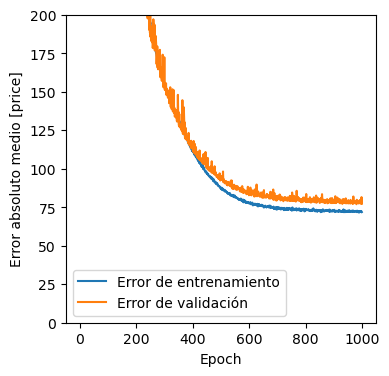

mse es el error cuadratico medio de las predicciones y la variable objetivo:


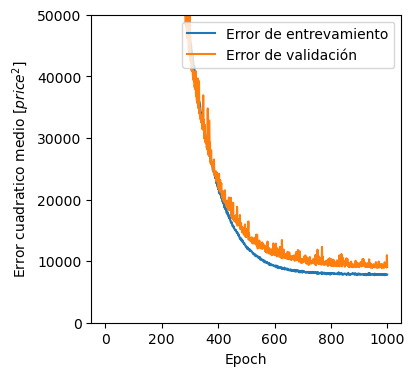

In [13]:
#En el entrenamiento de la red neuronal se obtuvieron los parámetros "mae" y "mse". mae es el error absoluto medio 
#y mse es el error cuadratico medio. Estas métricas nos entregan información sobre la exactitud del modelo,
#pero primero lo analizaremos visualmente: 
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    print("mae es el error absoluto entre las predicciones y la variable objetivo:")    
    plt.figure(figsize=[4,4])
    plt.xlabel('Epoch')
    plt.ylabel('Error absoluto medio [price]')
    plt.plot(hist['epoch'], hist['mae'], label='Error de entrenamiento')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Error de validación')
    plt.ylim([0,200])
    plt.legend()
    plt.show()
    
    print("mse es el error cuadratico medio de las predicciones y la variable objetivo:")
    plt.figure(figsize=[4,4])
    plt.xlabel('Epoch')
    plt.ylabel('Error cuadratico medio [$price^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Error de entrevamiento')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Error de validación')
    plt.ylim([0,50000])
    plt.legend()
    plt.show()

plot_history(history)

#### De los gráficos concluimos que 1000 épocas son suficientes para el entrenamiento del modelo, la convergencia no mejora luego de 800 épocas.

In [14]:
#Código de evaluación de la red propuesta (entrenamiento y validación)
modelo1_predicciones_train = modelo1.predict(x_train) #predicciones set de entrenamiento
train_mse_m1=mean_squared_error(y_train, modelo1_predicciones_train, squared=True)
train_mae_m1=mean_absolute_error(y_train, modelo1_predicciones_train)
print('MSE RF : ' , train_mse_m1)
print('MAE RF : ', train_mae_m1)

44/44 [==============================] - 0s 2ms/step
MSE RF :  7858.514665817033
MAE RF :  72.11845583234515


### Evalúe los resultados  para el conjunto de test.

In [15]:
#Código de evaluación de la red propuesta (evaluación conjunto de test)
modelo1_predicciones_test = modelo1.predict(x_test) #predicciones set de prueba
test_mse_m1=mean_squared_error(y_test, modelo1_predicciones_test, squared=True)
test_mae_m1=mean_absolute_error(y_test, modelo1_predicciones_test)
print('MSE RF : ' , test_mse_m1)
print('MAE RF : ', test_mae_m1)

19/19 [==============================] - 0s 2ms/step
MSE RF :  9473.259367153485
MAE RF :  73.19686355590821


In [16]:
#se calcula el coeficiente de correlación entre las predicciones y los datos de prueba de la variable objetivo
r11=scipy.stats.pearsonr(modelo1_predicciones_train.flatten(), y_train)[0].round(4)
r12=scipy.stats.pearsonr(modelo1_predicciones_test.flatten(), y_test)[0].round(4)
print('Coeficiente correlación - train: ',r11)
print('Coeficiente correlación - test: ',r12)

Coeficiente correlación - train:  0.9937
Coeficiente correlación - test:  0.9922


## Ajuste de modelos de Regresión alternativos

Elige al menos un método de regresión no basado en redes neuronales (p.ej. regresión lineal, regresión polinómica, regresión logarítmica, SVR, random forest regression, etc.).

In [17]:
#Código de ajuste del modelo 1 - Random forest Regressor 
modelo2=RandomForestRegressor(n_estimators=400, criterion='absolute_error') #se escogieron 400 árboles para el modelo 
modelo2.fit(x_train, y_train) #entrenamiento de el modelo
modelo2_predicciones_train = modelo2.predict(x_train) #predicciones set de entrenamiento 
modelo2_predicciones_test = modelo2.predict(x_test) #predicciones set de prueba 

In [18]:
#Código de ajuste del modelo 2 - Suport Vector Machine Regressor 
modelo3=svm.SVR(kernel='linear') #se escoge un modelo líneal 
modelo3.fit(x_train, y_train) #entrenamiento de el modelo
modelo3_predicciones_train = modelo3.predict(x_train) #predicciones set de entrenamiento 
modelo3_predicciones_test = modelo3.predict(x_test) #predicciones set de prueba 

In [19]:
#Código para mostrar la evaluación de los modelos
#evaluación del set de prueba para ambos modelos 
train_mse_m2=mean_squared_error(y_train, modelo2_predicciones_train, squared=True) #calculo de error cuadratico medio 
train_mae_m2=mean_absolute_error(y_train, modelo2_predicciones_train) 
print('MSE RFR - train: ' , train_mse_m2)
print('MAE RFR - train: ', train_mae_m2)

train_mse_m3=mean_squared_error(y_train, modelo3_predicciones_train, squared=True) #calculo de error cuadratico medio 
train_mae_m3=mean_absolute_error(y_train, modelo3_predicciones_train)
print('MSE SVR - train: ' , train_mse_m3)
print('MAE SVR - train: ', train_mae_m3)

r21=scipy.stats.pearsonr(modelo2_predicciones_train.flatten(), y_train)[0].round(4)
r31=scipy.stats.pearsonr(modelo3_predicciones_train.flatten(), y_train)[0].round(4)
print('Coeficiente correlación - train - RFR: ',r21)
print('Coeficiente correlación - train - SVR: ',r31)

print('             ')
#evaluación del set de entrenamiento para ambos modelos
test_mse_m2=mean_squared_error(y_test, modelo2_predicciones_test, squared=True) #calculo de error cuadratico medio 
test_mae_m2=mean_absolute_error(y_test, modelo2_predicciones_test)
print('MSE RFR - test: ' , test_mse_m2)
print('MAE RFR - test: ', test_mae_m2)

test_mse_m3=mean_squared_error(y_test, modelo3_predicciones_test, squared=True) #calculo de error cuadratico medio 
test_mae_m3=mean_absolute_error(y_test, modelo3_predicciones_test)
print('MSE SVR - test: ' , test_mse_m3)
print('MAE SVR - test: ', test_mae_m3)

r22=scipy.stats.pearsonr(modelo2_predicciones_test.flatten(), y_test)[0].round(4)
r32=scipy.stats.pearsonr(modelo3_predicciones_test.flatten(), y_test)[0].round(4)
print('Coeficiente correlación - test - RFR: ',r22)
print('Coeficiente correlación - test - SVR: ',r32)

MSE RFR - train:  1173.7580302689732
MAE RFR - train:  27.257911607142855
MSE SVR - train:  367159.9049771509
MAE SVR - train:  284.83442631200296
Coeficiente correlación - train - RFR:  0.9991
Coeficiente correlación - train - SVR:  0.9462
             
MSE RFR - test:  7705.59205098177
MAE RFR - test:  69.59853125
MSE SVR - test:  360731.8192310311
MAE SVR - test:  283.4781343123666
Coeficiente correlación - test - RFR:  0.9937
Coeficiente correlación - test - SVR:  0.9354


Se realizan 2 modelos a modo de comparación. El primer modelo es un Random Forest Regressor (RFR), con 400 árboles, el segundo es un Support Vector Machine Regressor (SVR). 
El modelo que más se ajusta a nuestro set de datos es el RFR. Para concluir esto se calculó el error absoluto medio (mae), el error cuadrático medio (mse) y el coeficiente de correlación (r) entre las predicciones y los datos de la variable objetivo (precio). Estos cálculos se hicieron para el set de prueba y el set de entrenamiento. 
- Para el set de entrenamiento: el valor de "mae" para RFR es de 27 y para SVR de 284 y el coeficiente r es de 0.99 y 0.94. Si bien ambos coeficientes son similares e indicar una fuerte correlación, el error dice todo lo contrario.
- Para el set de prueba: el valor de "mae" para RFR es de 69 y para SVR de 283 y el coeficiente r es de 0.99 y 0.93. Si bien ambos coeficientes son similares e indicar una fuerte correlación, el error nuevamente dice todo lo contrario.

Debido a los parámetros antes mencionados, se descarta SVR como modelo de predicción para este dataset, los resultados son muy inestables a pesar de tener un buen coeficiente de correlación, sin embargo, el error es muy alto, considerando que el rango de la variable a predecir (precio) es de 326 y 3099. 

## Comparación del desempeño de modelos

Muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

In [20]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en tabla
tabla=[["MSE - train", train_mse_m1, train_mse_m2, train_mse_m3],
       ["MSE- test", test_mse_m1, test_mse_m2, test_mse_m3],
       ["MAE - train", train_mae_m1, train_mae_m2, train_mae_m3],
       ["MAE- test", test_mae_m1, test_mae_m2, test_mae_m3], 
       ["Coeficiente correlación - train", r11, r21, r31],
       ["Coeficiente correlación - test", r12, r22, r32]
      ]

columnas = ["Parámetro", "Red Neuronal", "Random Forest Regressor", "SVR"]
print(tabulate(tabla, headers=columnas, tablefmt="grid"))

+---------------------------------+----------------+---------------------------+-------------+
| Parámetro                       |   Red Neuronal |   Random Forest Regressor |         SVR |
+=================================+================+===========================+=============+
| MSE - train                     |      7858.51   |                 1173.76   | 367160      |
+---------------------------------+----------------+---------------------------+-------------+
| MSE- test                       |      9473.26   |                 7705.59   | 360732      |
+---------------------------------+----------------+---------------------------+-------------+
| MAE - train                     |        72.1185 |                   27.2579 |    284.834  |
+---------------------------------+----------------+---------------------------+-------------+
| MAE- test                       |        73.1969 |                   69.5985 |    283.478  |
+---------------------------------+---------------

19/19 [==============================] - 0s 2ms/step


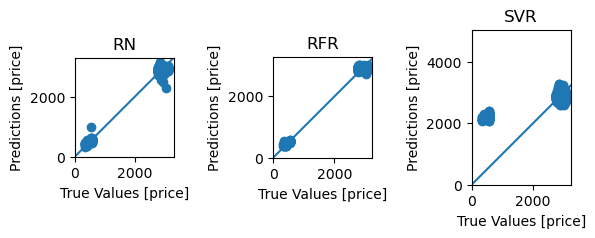

In [21]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica
test_predicciones1 = modelo1.predict(x_test).flatten()
error1 = test_predicciones1 - y_test
test_predicciones2 = modelo2.predict(x_test).flatten()
error2 = test_predicciones2 - y_test
test_predicciones3 = modelo3.predict(x_test).flatten()
error3 = test_predicciones3 - y_test

#gráficos de dispersión para los 3 modelos para observar correlación 
figure=plt.gcf()
plt.subplots_adjust(wspace=1, hspace=2)
#Red neuronal
plt.subplot(1,3,1)
plt.scatter(y_test, test_predicciones1)
plt.xlabel('True Values [price]')
plt.ylabel('Predictions [price]')
plt.axis('equal')
plt.axis('square')
plt.title('RN')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-10000, 10000], [-10000, 10000])
#RFR
plt.subplot(1,3,2)
plt.scatter(y_test, test_predicciones2)
plt.xlabel('True Values [price]')
plt.ylabel('Predictions [price]')
plt.axis('equal')
plt.axis('square')
plt.title('RFR')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-10000, 10000], [-10000, 10000])
#SVR
plt.subplot(1,3,3)
plt.scatter(y_test, test_predicciones3)
plt.xlabel('True Values [price]')
plt.ylabel('Predictions [price]')
plt.axis('equal')
plt.axis('square')
plt.title('SVR')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-10000, 10000], [-10000, 10000])

fig.suptitle('True values v/s Predicciones')
plt.show()

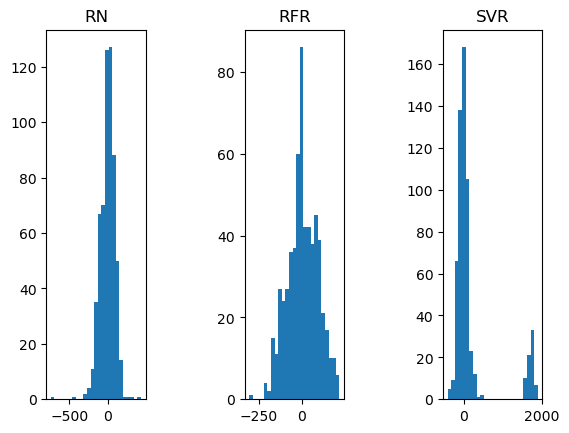

In [22]:
#histograma de error entre las predicciones y el set de prueba de la varible objetivo "price" para los 3 modelos
figure=plt.gcf()
plt.subplots_adjust(wspace=1, hspace=2)
#red neuronal 
plt.subplot(1,3,1)
plt.hist(error1, bins = 25)
plt.title('RN')
#RFR
plt.subplot(1,3,2)
plt.hist(error2, bins = 25)
plt.title('RFR')
#SVR
plt.subplot(1,3,3)
plt.hist(error3, bins = 25)
plt.title('SVR')

fig.suptitle('Prediction Error [price]')
plt.show()

En el primer set de datos se observan los gráficos de dispersión para los 3 modelos para visualizar la correlación de los datos de la varible objetivo "price" y las predicciones. SVR es modelo que entrega la predicción más errónea, los datos no siguen una regresión lineal. 
En cuanto a la red neuronal y RFR, estos modelos se comportan suficientemente bien como para confiar en sus predicciones. 
Si sumanmos al análisis la distribución de los errores, nuevamente SVR presenta errores muy altos en comparación de la red neuronal y RFR, siendo la red neuronal el modelo que más concentra su error alrededor de 0. 

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

Al analizar las distintas métricas para los 3 modelos estudiados, es dificil elegir entre la red neuronal o el random forest regressor. 
Automaticamente se descarta el modelo Support Vector Machine Regressor debido a las métricas entregadas: mae de prueba 284 y mae de entrenamiento 283. Debemos considerar el rango de la variable objetivo (326 y 3099). Si permitimos el error del modelo SVR, la predicción se alejaría considerablemente de el valor real. 
Ahora, entre la red neuronal y RFR las métricas son similares: 
- mae entrenamiento y test red neuronal: 72 y 73
- mae entrenamiento y test RFR: 27 y 69. 
- coeficiente correlación entrenamiento y test ambos modelos: 0.99 y 0.99 / 0.99 y 0.99

El coeficiente de correlación es excelente para ambos modelos en los set de datos y entrenamiento, pero visualmente observamos algo distinto: la red no se ajustan tan bien. Tomemos en cuenta los valores de mae para el set de prueba: 74 y 69 (red neuronal y RFR), valores similares y poco definitorios. Agregamos la distribución de error que se produce entre los valores predichos y los reales de prueba (y_test), la red neuronal presenta el mejor comportamiento, visualmente estos valores están concentrados alrededor de 0. 

Con las métricas analizadas, podemos concluir que la red neuronal esta por sobre RFR y SVR, por lo que deducimos que la predicción del precio de los diamantes es confiable, sin embargo, esto se puede mejorar.

Una mejora para los resultados obtenidos es utilizar un set de datos con variables balanceadas. Cuando se tienen datos dispersos los modelos de predicción tienden a entregar resultados erróneos. Si no es posible conseguir un set de datos más homógeneo, la estándarización de datos puede ser una forma rápida y al alcance para modelar. 

También existen capas de para prevenir el sobre o poco ajuste, como "tf.keras.layers.Dropout". Al modelar la red neuronal se utilizaron a modo de prueba, pero para este set de datos solo obstaculizaba la convergencia. 

In [23]:
#from ann_visualizer.visualize import ann_viz
#ann_viz(modelo1, title="Red Neuronal Artificial - Regresión");